<a href="https://colab.research.google.com/github/xs2445/Algorithms/blob/main/Stack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stack

225 [E] Implement Stack using Queues

232 [E] Implement Queue using Stacks

20 [M] Valid Parentheses

150 [M] Evaluate Reverse Polish Notation

239 [H] Sliding Window Maximum

703 [E] Kth Largest Element in a Stream

1047 [E] Remove All Adjacent Duplicates In String


In [1]:
from typing import List, Optional
from collections import deque

## 225 [E] Implement Stack using Queues

In [ ]:
# LIFO

class MyStack:
    def __init__(self):
        self._queue = deque()

    def push(self, x: int) -> None:
        self._queue.append(x)

    def pop(self) -> int:
        return self._queue.pop()
        
    def top(self) -> int:
        return self._queue[-1]
        
    def empty(self) -> bool:
        return not len(self._queue)
        


# Your MyStack object will be instantiated and called as such:
# obj = MyStack()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.top()
# param_4 = obj.empty()

## 232 [E] Implement Queue using Stacks

In [ ]:
# FIFO

class MyQueue:

    def __init__(self):
        self._stack = []

    def push(self, x: int) -> None:
        self._stack.append(x)

    def pop(self) -> int:
        return self._stack.pop(0)

    def peek(self) -> int:
        return self._stack[0]
        
    def empty(self) -> bool:
        return not len(self._stack)

## 20 [M] Valid Parentheses

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
        stack = []
        mapping = {
            ")": "(",
            "]": "[",
            "}": "{"
        }
        for char in s:
            if char in mapping:
                # .pop() return the top element (last in)
                top_element = stack.pop() if stack else '#'
                if mapping[char] != top_element:
                    return False
            else:
                stack.append(char)
        # check closure
        # if stack has element then 's' is not closed
        return not stack

## 150 [M] Evaluate Reverse Polish Notation

In [14]:
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        stack = []
        operations = {"+", "-", "*", "/"}
        for char in tokens:
            if char in operations:
                num2 = stack.pop()
                num1 = stack.pop()
                if char == "+":
                    stack.append(num1+num2)
                elif char == "-":
                    stack.append(num1-num2)
                elif char =="*":
                    stack.append(num1*num2)
                else:
                    stack.append(int(num1/num2))
                print("{}{}{}={}".format(num1,char,num2,stack[-1]))
            else:
                stack.append(int(char))

        return stack[0]

In [17]:
### NOTE! "//" is the floor function, round down to an integer
print(6//-132)
# should use int() to truncate decimals
print(int(6/-132))

-1
0


In [10]:
sol = Solution()
sample1 = ["10","6","9","3","+","-11","*","/","*","17","+","5","+"]
res = sol.evalRPN(sample1)
print(res)

9+3=12
12*-11=-132
6/-132=-1
10*-1=-10
-10+17=7
7+5=12
12


In [ ]:
# using lambda function

class Solution:
    def evalRPN(self, tokens: List[str]) -> int:

        operations = {
            "+": lambda a, b: a + b,
            "-": lambda a, b: a - b,
            "*": lambda a, b: a * b,
            "/": lambda a, b: int(a / b)
        }

        stack = []

        for char in tokens:
            if char in operations:
                num2 = stack.pop()
                num1 = stack.pop()
                stack.append(operations[char](num1, num2))
            else:
                stack.append(int(char))

        return stack[0]
        

## 239 [H] Sliding Window Maximum

In [ ]:
# naive solution exceeded time limitation

class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        stack = []
        for idx in range(len(nums)-k+1):
            stack.append(max(nums[idx:idx+k]))
        
        return stack

In [52]:
# use deque to store indexes of nums
# make sure the first element in the deque is the largest

class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        # base cases
        n = len(nums)
        if n * k == 0:
            return []
        if k == 1:
            return nums
        
        def clean_deque(i):
        # make sure the firstelement is the largest
            # more than k elements in the stack
            if deq and deq[0] == i - k:
                deq.popleft()
            # remove from deq indexes of all elements 
            # which are smaller than current element nums[i]
            while deq and nums[i] > nums[deq[-1]]:
                deq.pop()
        
        # init deque and output
        deq = deque()
        max_idx = 0
        for i in range(k):
            clean_deque(i)
            deq.append(i)
            # compute max in nums[:k]
            if nums[i] > nums[max_idx]:
                max_idx = i
        output = [nums[max_idx]]
        print(deq)
        
        # build output
        for i in range(k, n):
            # clear all elements in the deq that is smaller than the nums[i]
            # the deq also maintain the length to be smaller than k
            clean_deque(i)   
            # then append i, the first element in deq is the largest in the window
            deq.append(i)
            
            output.append(nums[deq[0]])
        return output


class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        if not nums:
            return []
        if k == 1:
            return nums
        
        def clear_deq(deq):
            if deq and idx - deq[0] >= k:
                print(deq.popleft())
            while deq and nums[idx] > nums[deq[-1]]:
                deq.pop()
        
        deq = deque()

        for idx in range(k):
            clear_deq(deq)
            deq.append(idx)
            print(deq)

        output = [nums[deq[0]]]

        for idx in range(k, len(nums)):
            clear_deq(deq)
            deq.append(idx)
            output.append(nums[deq[0]])

        return output



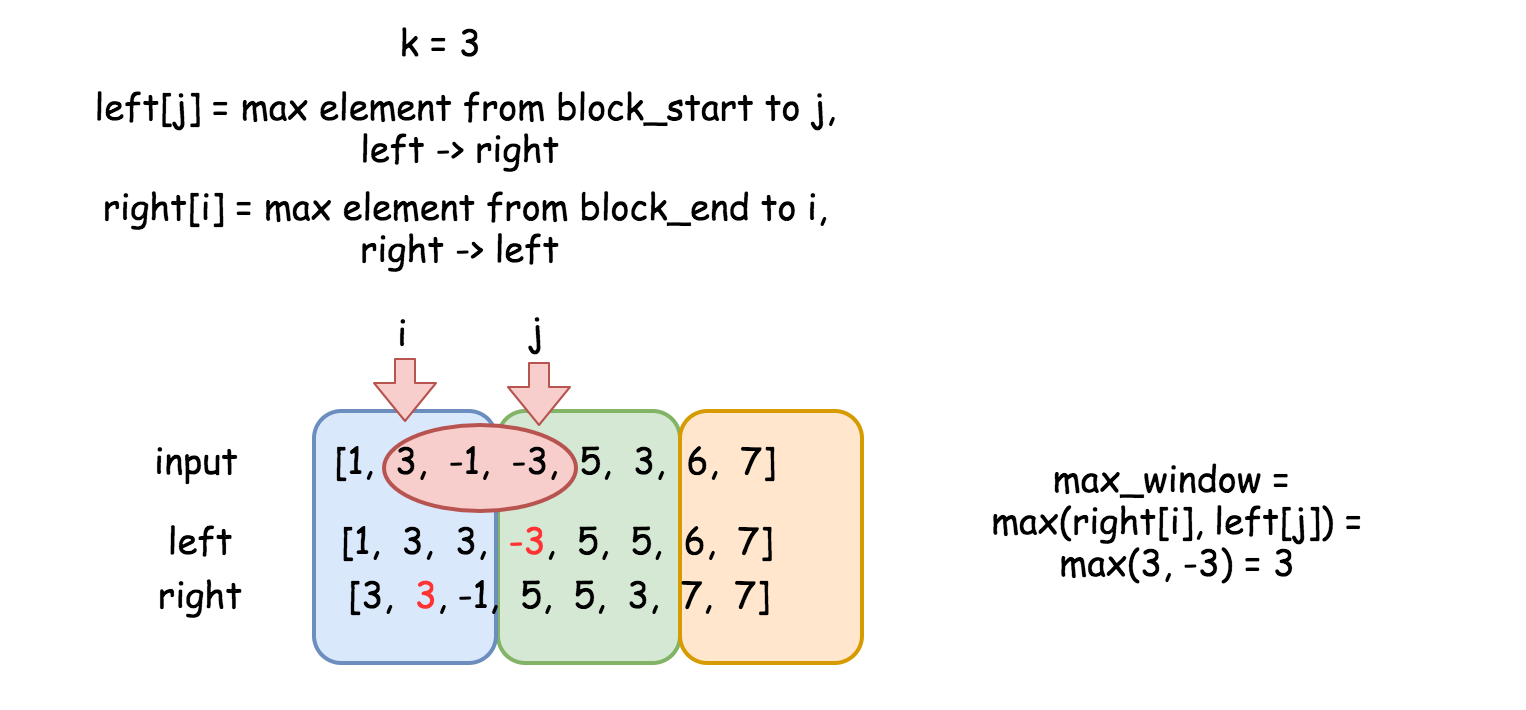

In [33]:
# DP

class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        l = len(nums)
        if l*k == 0:
            return []
        if k == 1:
            return nums
        # this will make two array with same pointer
        # left = right = [0] * l
        left = [0] * l
        right = [0] * l
        left[0] = nums[0]
        right[-1] = nums[-1]

        for i in range(1, l):
            if i%k == 0:
                left[i] = nums[i]
            else:
                left[i] = max(left[i-1], nums[i])
            j = l - i - 1
            # print(i, j)
            if (j+1)%k == 0:
                right[j] = nums[j]
            else:
                right[j] = max(right[j+1], nums[j])
        
        output = []
        for i in range(l-k+1):
            j = i + k - 1
            output.append(max(left[j], right[i]))
        
        return output

In [34]:
sol = Solution()
sample = [1,3,-1,-3,5,3,6,5]
k = 3
sample = [1]
k = 1
sample = [7,2,4]
k = 2
sample = [1,3,1,2,0,5]
k = 3
sample = [1,3,-1,-3,5,3,6,7]
k = 3
print(sol.maxSlidingWindow(sample, k))

[1, 3, 3, -3, 5, 5, 6, 7] [3, 3, -1, 5, 5, 3, 7, 7]
[3, 3, 5, 5, 6, 7]


## 703 [E] Kth Largest Element in a Stream

In [ ]:
# heap

import heapq

class KthLargest:

    def __init__(self, k: int, nums: List[int]):
        self.heap = nums
        self.k = k
        heapq.heapify(self.heap)

        while len(self.heap) > k:
            heapq.heappop(self.heap)
    
    def add(self, val:int) -> int:
        heapq.heappush(self.heap, val)
        if len(self.heap) > self.k:
            heapq.heappop(self.heap)
        return self.heap[0]

# Your KthLargest object will be instantiated and called as such:
# obj = KthLargest(k, nums)
# param_1 = obj.add(val)

## 1047 [E] Remove All Adjacent Duplicates In String

In [16]:
# use deque 142ms, 14.7MB

class Solution:
    def removeDuplicates(self, s: str) -> str:
        if len(s)<2:
            return s

        deq = deque()
        for char in s:
            if deq and char == deq[-1]:
                deq.pop()
            else:
                deq.append(char)
        return "".join(list(deq))

In [18]:
# use list 91ms, 14.5MB
# using list is much faster than using deque

class Solution:
    def removeDuplicates(self, S: str) -> str:
        output = []
        for ch in S:
            if output and ch == output[-1]: 
                output.pop()
            else: 
                output.append(ch)
        return ''.join(output)

In [19]:
sample = "abbaca"
sol = Solution()
res = sol.removeDuplicates(sample)
print(res)

ca
